In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from fuzzywuzzy import fuzz
import missingno as msno

In [34]:
read = pd.read_csv('..\data\processed\\rentals_cleaned.csv')

In [35]:
rentals = read.copy()

In [36]:
rentals.shape

(82003, 29)

In [5]:
rentals.head()

,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,yearConstructed,...,lift,typeOfFlat,zip_code,noRooms,thermalChar,numberOfFloors,garden,district,town_municipality,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,1965-01-01,...,False,ground_floor,44269,4.0,181.4,3.0,True,Dortmund,Schüren,2019-05-01
1,Baden_Württemberg,110.0,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.0,1970-01-01,...,False,roof_storey,79211,2.0,138.0,2.0,False,Emmendingen,Denzlingen,2020-02-01
2,Thüringen,80.0,district_heating,ONE_YEAR_FREE,False,True,5,1.67,2.4,1990-01-01,...,False,apartment,99427,1.0,79.0,5.0,False,Weimar,Schöndorf,2018-09-01
3,Niedersachsen,290.0,district_heating,ONE_YEAR_FREE,False,True,35,2.35,5.0,2013-01-01,...,True,apartment,37073,5.0,110.0,4.0,False,Göttingen,Göttingen,2019-10-01
4,Schleswig_Holstein,140.0,central_heating,ONE_YEAR_FREE,False,True,15,5.00,10.0,1978-01-01,...,False,ground_floor,24539,4.0,187.0,2.0,True,Neumünster,Wittorf,2019-10-01


In [7]:
read2 = pd.read_csv('..\data\processed\\state_features.csv')

In [8]:
state = read2.copy()

In [9]:
state

,state,area_km2,population_2019,population_per_km2,gdp_per_capita_2018,hdi
0,Baden-Württemberg,35752,11100394,310,47290,0.953
1,Bavaria(Bayern),70552,13124737,185,48323,0.947
2,Berlin,892,3669491,4086,41967,0.950
3,Brandenburg,29479,2521893,85,29541,0.914
4,Bremen,419,681202,1630,49215,0.951
5,Hamburg,755,1847253,2439,66879,0.975
6,Hesse(Hessen),21115,6288080,297,46923,0.949
7,Lower Saxony(Niedersachsen),47609,7993448,168,38423,0.922
8,Mecklenburg-Vorpommern,23180,1609675,69,28940,0.910
9,North Rhine-Westphalia(Nordrhein-Westfalen),34085,17932651,526,39678,0.936


In [10]:
state_supply = rentals.groupby(['state']).agg(total_state_listings = pd.NamedAgg(column = 'baseRent', aggfunc = 'size'), \
                                               total_state_sqm = pd.NamedAgg(column = 'livingSpace', aggfunc = 'sum'))

In [11]:
state_supply

,total_state_listings,total_state_sqm
state,,
Baden_Württemberg,3306,282972.70
Bayern,5613,452839.92
Berlin,4421,374408.26
Brandenburg,2771,189691.19
Bremen,896,67149.19
Hamburg,1194,97216.36
Hessen,4216,360437.49
Mecklenburg_Vorpommern,2341,145203.75
Niedersachsen,4106,309448.79


In [12]:
state_supply.reset_index(inplace = True)
state_supply

,state,total_state_listings,total_state_sqm
0,Baden_Württemberg,3306,282972.70
1,Bayern,5613,452839.92
2,Berlin,4421,374408.26
3,Brandenburg,2771,189691.19
4,Bremen,896,67149.19
5,Hamburg,1194,97216.36
6,Hessen,4216,360437.49
7,Mecklenburg_Vorpommern,2341,145203.75
8,Niedersachsen,4106,309448.79
9,Nordrhein_Westfalen,19267,1427174.02


In [13]:
#View the names of states from our geo_economy dataframe
stateNames_geo_economy = state.state
stateNames_geo_economy

0                               Baden-Württemberg
1                                 Bavaria(Bayern)
2                                          Berlin
3                                     Brandenburg
4                                          Bremen
5                                         Hamburg
6                                   Hesse(Hessen)
7                     Lower Saxony(Niedersachsen)
8                          Mecklenburg-Vorpommern
9     North Rhine-Westphalia(Nordrhein-Westfalen)
10          Rhineland-Palatinate(Rheinland-Pfalz)
11                                       Saarland
12                                Saxony(Sachsen)
13                  Saxony-Anhalt(Sachsen-Anhalt)
14                             Schleswig-Holstein
15                           Thuringia(Thüringen)
Name: state, dtype: object

In [14]:
#View the names of states from our rentals_eda dataframe
stateNames_rentals_eda = list(set(rentals.state))
stateNames_rentals_eda

['Berlin',
 'Bayern',
 'Baden_Württemberg',
 'Rheinland_Pfalz',
 'Saarland',
 'Thüringen',
 'Nordrhein_Westfalen',
 'Mecklenburg_Vorpommern',
 'Brandenburg',
 'Niedersachsen',
 'Sachsen_Anhalt',
 'Hessen',
 'Bremen',
 'Hamburg',
 'Schleswig_Holstein',
 'Sachsen']

In [15]:
#Change state names from geo_economy dataframe to state names from rentals_eda
for geo_name in stateNames_geo_economy:
    for rentals_name in stateNames_rentals_eda:
        if fuzz.WRatio(geo_name, rentals_name) > 80:
            state.state = state.state.replace(geo_name, rentals_name)
            
state.state  

0          Baden_Württemberg
1                     Bayern
2                     Berlin
3                Brandenburg
4                     Bremen
5                    Hamburg
6                     Hessen
7              Niedersachsen
8     Mecklenburg_Vorpommern
9        Nordrhein_Westfalen
10           Rheinland_Pfalz
11                  Saarland
12                   Sachsen
13            Sachsen_Anhalt
14        Schleswig_Holstein
15                 Thüringen
Name: state, dtype: object

In [16]:
state.reset_index(inplace = True)
state.head()

,index,state,area_km2,population_2019,population_per_km2,gdp_per_capita_2018,hdi
0,0,Baden_Württemberg,35752,11100394,310,47290,0.953
1,1,Bayern,70552,13124737,185,48323,0.947
2,2,Berlin,892,3669491,4086,41967,0.950
3,3,Brandenburg,29479,2521893,85,29541,0.914
4,4,Bremen,419,681202,1630,49215,0.951


In [17]:
new_state = pd.merge(state, state_supply, on = 'state', how = 'inner')
new_state

,index,state,area_km2,population_2019,population_per_km2,gdp_per_capita_2018,hdi,total_state_listings,total_state_sqm
0,0,Baden_Württemberg,35752,11100394,310,47290,0.953,3306,282972.70
1,1,Bayern,70552,13124737,185,48323,0.947,5613,452839.92
2,2,Berlin,892,3669491,4086,41967,0.950,4421,374408.26
3,3,Brandenburg,29479,2521893,85,29541,0.914,2771,189691.19
4,4,Bremen,419,681202,1630,49215,0.951,896,67149.19
5,5,Hamburg,755,1847253,2439,66879,0.975,1194,97216.36
6,6,Hessen,21115,6288080,297,46923,0.949,4216,360437.49
7,7,Niedersachsen,47609,7993448,168,38423,0.922,4106,309448.79
8,8,Mecklenburg_Vorpommern,23180,1609675,69,28940,0.910,2341,145203.75
9,9,Nordrhein_Westfalen,34085,17932651,526,39678,0.936,19267,1427174.02


In [18]:
new_state.drop(columns = ['index'], inplace = True)
new_state.head()

,state,area_km2,population_2019,population_per_km2,gdp_per_capita_2018,hdi,total_state_listings,total_state_sqm
0,Baden_Württemberg,35752,11100394,310,47290,0.953,3306,282972.70
1,Bayern,70552,13124737,185,48323,0.947,5613,452839.92
2,Berlin,892,3669491,4086,41967,0.950,4421,374408.26
3,Brandenburg,29479,2521893,85,29541,0.914,2771,189691.19
4,Bremen,419,681202,1630,49215,0.951,896,67149.19


In [19]:
new_state['listings_per_100kcapita'] = (new_state.total_state_listings / new_state.population_2019) * 100
new_state['listings_per_10ksqm'] = (new_state.total_state_sqm / new_state.population_2019) * 10
new_state.head()

,state,area_km2,population_2019,population_per_km2,gdp_per_capita_2018,hdi,total_state_listings,total_state_sqm,listings_per_100kcapita,listings_per_10ksqm
0,Baden_Württemberg,35752,11100394,310,47290,0.953,3306,282972.70,0.029783,0.254921
1,Bayern,70552,13124737,185,48323,0.947,5613,452839.92,0.042767,0.345028
2,Berlin,892,3669491,4086,41967,0.950,4421,374408.26,0.120480,1.020328
3,Brandenburg,29479,2521893,85,29541,0.914,2771,189691.19,0.109878,0.752178
4,Bremen,419,681202,1630,49215,0.951,896,67149.19,0.131532,0.985746


In [20]:
new_state.drop(columns = ['population_2019', 'area_km2', 'total_state_listings', 'total_state_sqm'], inplace = True)
new_state.head()

,state,population_per_km2,gdp_per_capita_2018,hdi,listings_per_100kcapita,listings_per_10ksqm
0,Baden_Württemberg,310,47290,0.953,0.029783,0.254921
1,Bayern,185,48323,0.947,0.042767,0.345028
2,Berlin,4086,41967,0.950,0.120480,1.020328
3,Brandenburg,85,29541,0.914,0.109878,0.752178
4,Bremen,1630,49215,0.951,0.131532,0.985746


In [21]:
rentals['rent_per_sqm'] = rentals.baseRent / rentals.livingSpace
rentals.head()

,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,yearConstructed,...,typeOfFlat,zip_code,noRooms,thermalChar,numberOfFloors,garden,district,town_municipality,date,rent_per_sqm
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,1965-01-01,...,ground_floor,44269,4.0,181.4,3.0,True,Dortmund,Schüren,2019-05-01,6.918605
1,Baden_Württemberg,110.0,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.0,1970-01-01,...,roof_storey,79211,2.0,138.0,2.0,False,Emmendingen,Denzlingen,2020-02-01,10.943396
2,Thüringen,80.0,district_heating,ONE_YEAR_FREE,False,True,5,1.67,2.4,1990-01-01,...,apartment,99427,1.0,79.0,5.0,False,Weimar,Schöndorf,2018-09-01,6.006006
3,Niedersachsen,290.0,district_heating,ONE_YEAR_FREE,False,True,35,2.35,5.0,2013-01-01,...,apartment,37073,5.0,110.0,4.0,False,Göttingen,Göttingen,2019-10-01,10.500039
4,Schleswig_Holstein,140.0,central_heating,ONE_YEAR_FREE,False,True,15,5.00,10.0,1978-01-01,...,ground_floor,24539,4.0,187.0,2.0,True,Neumünster,Wittorf,2019-10-01,7.187500


In [22]:
rentals = rentals.merge(new_state, on = 'state', how = 'left')
rentals.head()

,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,yearConstructed,...,garden,district,town_municipality,date,rent_per_sqm,population_per_km2,gdp_per_capita_2018,hdi,listings_per_100kcapita,listings_per_10ksqm
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,1965-01-01,...,True,Dortmund,Schüren,2019-05-01,6.918605,526,39678,0.936,0.107441,0.795852
1,Baden_Württemberg,110.0,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.0,1970-01-01,...,False,Emmendingen,Denzlingen,2020-02-01,10.943396,310,47290,0.953,0.029783,0.254921
2,Thüringen,80.0,district_heating,ONE_YEAR_FREE,False,True,5,1.67,2.4,1990-01-01,...,False,Weimar,Schöndorf,2018-09-01,6.006006,133,29883,0.921,0.165551,1.040446
3,Niedersachsen,290.0,district_heating,ONE_YEAR_FREE,False,True,35,2.35,5.0,2013-01-01,...,False,Göttingen,Göttingen,2019-10-01,10.500039,168,38423,0.922,0.051367,0.387128
4,Schleswig_Holstein,140.0,central_heating,ONE_YEAR_FREE,False,True,15,5.00,10.0,1978-01-01,...,True,Neumünster,Wittorf,2019-10-01,7.187500,183,33712,0.920,0.070943,0.513165


In [32]:
rentals.shape

(82003, 35)

In [23]:
rentals[rentals.rent_per_sqm.isnull()]

,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,yearConstructed,...,garden,district,town_municipality,date,rent_per_sqm,population_per_km2,gdp_per_capita_2018,hdi,listings_per_100kcapita,listings_per_10ksqm


In [24]:
new_rentals = rentals[~rentals.rent_per_sqm.isnull()]

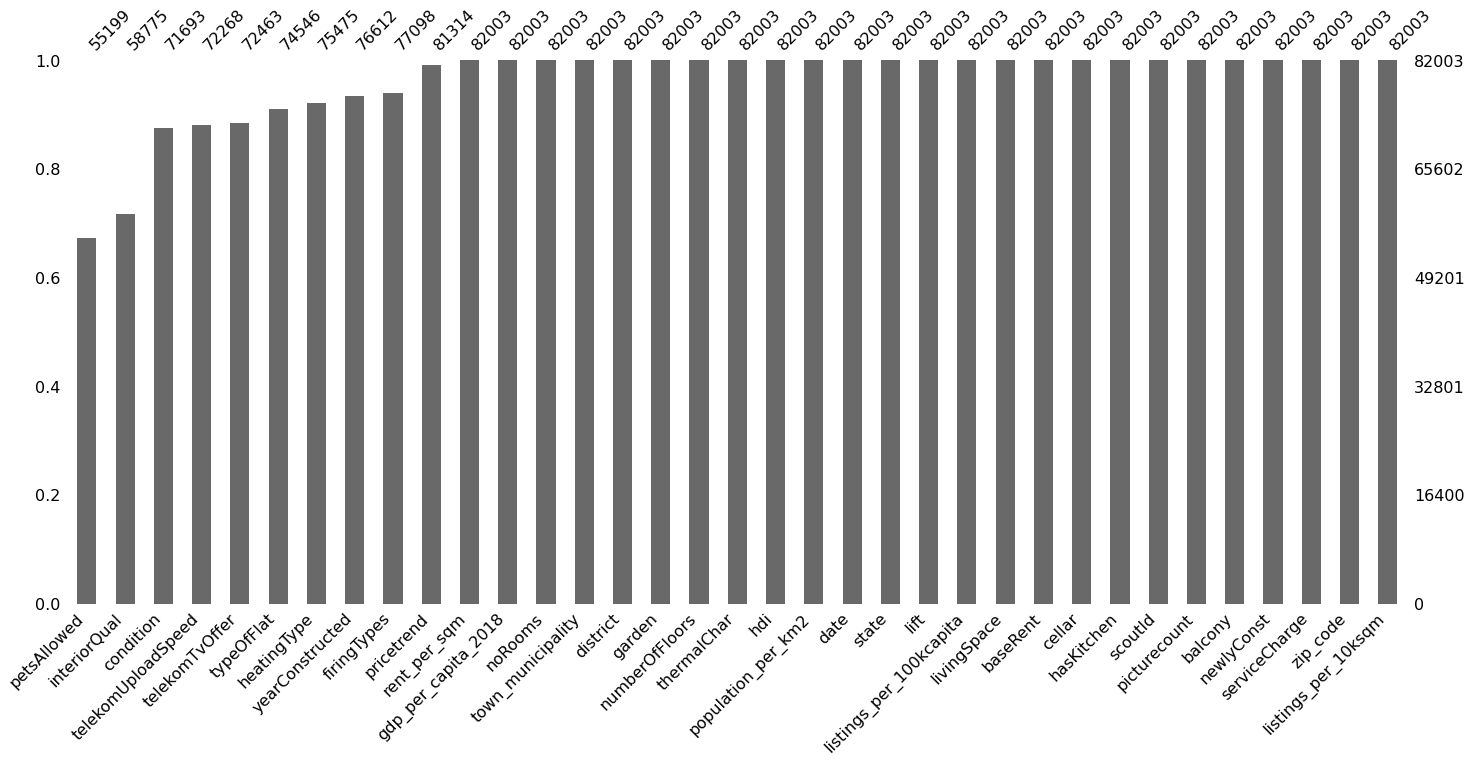

In [25]:
_= msno.bar(new_rentals, sort = 'ascending')

In [26]:
missing = new_rentals.loc[:,new_rentals.isnull().any()]
missing.head()

,heatingType,telekomTvOffer,pricetrend,telekomUploadSpeed,yearConstructed,firingTypes,condition,interiorQual,petsAllowed,typeOfFlat
0,central_heating,ONE_YEAR_FREE,4.62,10.0,1965-01-01,oil,well_kept,normal,NaN,ground_floor
1,oil_heating,ONE_YEAR_FREE,3.77,40.0,1970-01-01,oil,well_kept,sophisticated,no,roof_storey
2,district_heating,ONE_YEAR_FREE,1.67,2.4,1990-01-01,district_heating,first_time_use_after_refurbishment,NaN,NaN,apartment
3,district_heating,ONE_YEAR_FREE,2.35,5.0,2013-01-01,district_heating,mint_condition,sophisticated,negotiable,apartment
4,central_heating,ONE_YEAR_FREE,5.00,10.0,1978-01-01,gas,well_kept,sophisticated,negotiable,ground_floor


In [27]:
missing.columns

Index(['heatingType', 'telekomTvOffer', 'pricetrend', 'telekomUploadSpeed',
       'yearConstructed', 'firingTypes', 'condition', 'interiorQual',
       'petsAllowed', 'typeOfFlat'],
      dtype='object')

In [28]:
missing.shape

(82003, 10)

In [29]:
new_rentals.shape

(82003, 35)